# <center> Disney Studio Income Analysis

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import io

In [3]:
from google.colab import files

In [4]:
upload=files.upload()

Saving disney_movies.csv to disney_movies.csv


## Task 1: Data Exploration

Checking Null Values , release_date into datatime , best & worst total gross

In [5]:
df=pd.read_csv(io.BytesIO(upload['disney_movies.csv']))
print(df)

                         movie_title release_date      genre mpaa_rating  \
0    Snow White and the Seven Dwarfs   1937-12-21    Musical           G   
1                          Pinocchio   1940-02-09  Adventure           G   
2                           Fantasia   1940-11-13    Musical           G   
3                  Song of the South   1946-11-12  Adventure           G   
4                         Cinderella   1950-02-15      Drama           G   
..                               ...          ...        ...         ...   
574         The Light Between Oceans   2016-09-02      Drama       PG-13   
575                   Queen of Katwe   2016-09-23      Drama          PG   
576                   Doctor Strange   2016-11-04  Adventure       PG-13   
577                            Moana   2016-11-23  Adventure          PG   
578     Rogue One: A Star Wars Story   2016-12-16  Adventure       PG-13   

     total_gross  inflation_adjusted_gross  
0      184925485                5228953251

In [6]:
df.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730


In [7]:
df.isnull().sum()

movie_title                  0
release_date                 0
genre                       17
mpaa_rating                 56
total_gross                  0
inflation_adjusted_gross     0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   movie_title               579 non-null    object
 1   release_date              579 non-null    object
 2   genre                     562 non-null    object
 3   mpaa_rating               523 non-null    object
 4   total_gross               579 non-null    int64 
 5   inflation_adjusted_gross  579 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 27.3+ KB


In [9]:
## Converting release_date to date type:
df['release_date']=pd.to_datetime(df['release_date'])


In [10]:
max(df['total_gross']),min(df['total_gross'])

(936662225, 0)

## Task 2: Visualize Year Distribution Plot

In [11]:
# Let's create an column named year to visualize later
df['year'] = df['release_date'].dt.date.astype(str).str.split('-', expand=True)[0]

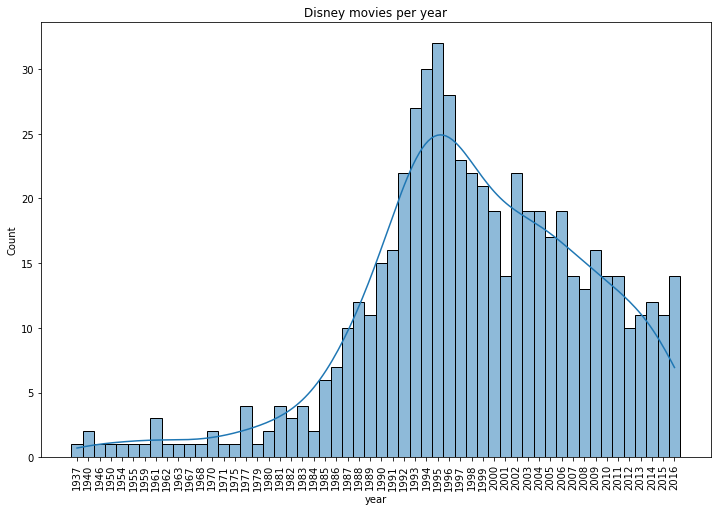

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))
plt.xticks(rotation=90)
plt.title('Disney movies per year')
sns.histplot(df['year'], kde=True)

## Task 3: Does Movies Income Decreased or Increased?

In [13]:
year_income = df.groupby('year').sum()


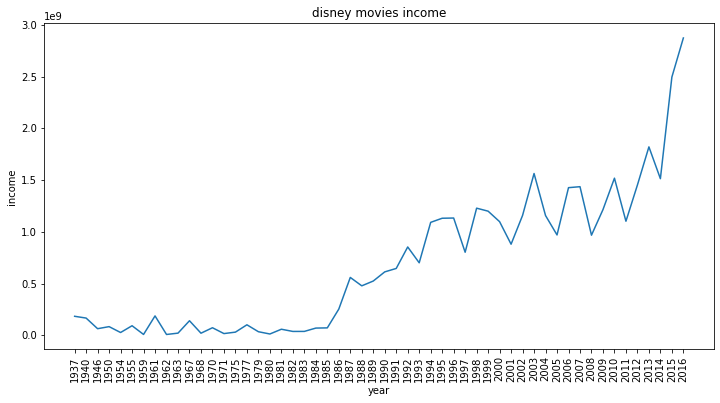

In [14]:
plt.figure(figsize=(12, 6))
plt.title('disney movies income')
plt.xlabel('year')
plt.ylabel('income')
plt.xticks(rotation=90)
sns.lineplot(x=year_income.index, y=year_income['total_gross'])

## Task 4: Describe the total counts of Genres

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


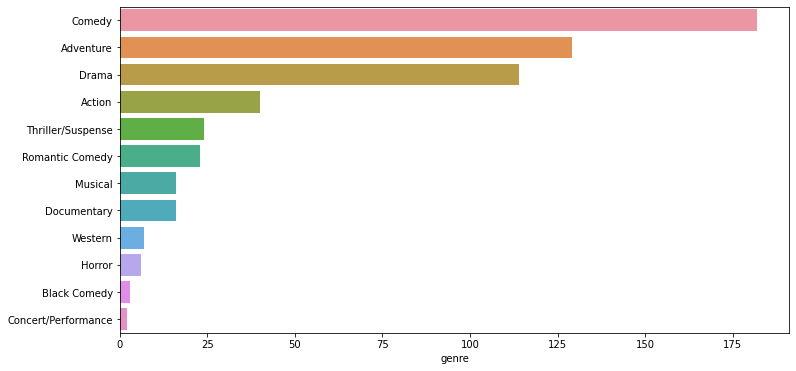

In [16]:
# plt.figure(figsize=(12,8))
plt.figure(figsize=(12, 6))
genre=df['genre'].value_counts()
sns.barplot(genre,genre.index)